In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import preprocessing
# set seaborn's default settings
sns.set()

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) # create a dataframe from the data in iris with appropirate column names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [163]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # remove the ' (cm)' from the column names
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [164]:
df['target'] = iris.target # add a column with the species id
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) # add a column with the species name for easier human user readability
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Now that we have all our data, lets take a look at the shape of our dataset, and get a description and some information about the data.

In [165]:
print(df.shape)
print(df.index)
print(df.columns)

(150, 6)
RangeIndex(start=0, stop=150, step=1)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
       'species'],
      dtype='object')


We can see our data has 150 rows and 5 columns, and steps through the data in increments of 1.

In [166]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
 5   species       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


Our data is mostly float values and has no null values, meaning no data is missing.

We can also check for missing data using the following commands:

In [168]:
# lets check for missing data in the dataframe
missing_data = df.isna()
missing_data

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [169]:
missing_data_columns = df.isna().sum()
missing_data_columns

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
species         0
dtype: int64

In [170]:
missing_data_total = df.isna().sum().sum()
missing_data_total

0

There is no missing data in the dataset.

Let's also check for duplicated rows.

In [171]:
df.drop_duplicates(inplace=True)
df.shape 

(149, 6)

In [172]:
1/len(df)

0.006711409395973154

There is one duplicate as we can see by the one reduced row in the dataframe shape.
We used inpace=True so the original dataframe is changed.  
Even though two flowers can have all 4 of the same attributes, we did this because that seems unlikely. A flower might have just been measured twice.  
Also, this one row does not affect the data much. It is only ~0.6% of the data.

The dataframe can also be reindexed to account for the missing row.

In [173]:
df.reset_index(drop=True, inplace=True) # use the drop=True to avoid the old index being added as a column, and having to drop it later
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [174]:
df.shape

(149, 6)

Now our data should be well clean so lets prep some items for analysis.  

Lets take a look at the info again to see the data types of each column.

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   target        149 non-null    int32  
 5   species       149 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.5+ KB


We can also inspect how many unique values are there in each column. This is useful for categorical data as if there are very few unique values, we can consider them as categorical data, even if it is not an object type.

In [176]:
df.nunique(axis=0) 

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
target           3
species          3
dtype: int64

We can organize our data to get two main distinct lists for categorical and numerical columns.  
(We will also get a separate list for the target column which is correlated with the species column as this will be useful later for analysis.)

In [177]:
nums = list(df.select_dtypes(exclude=['object']).columns)
cats = list(df.select_dtypes(include=['object']).columns)
cats_id = list(df.select_dtypes(include=['int32']).columns)
print(f'numerical variables:  {nums}')
print(f'categorical variables:  {cats}')
print(f'categorical_id variables:  {cats_id}')

numerical variables:  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
categorical variables:  ['species']
categorical_id variables:  ['target']


Lets use our numerical columns as our data's 4 features to search for any trends.

In [178]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int32
species          object
dtype: object

`Inital Plotting`  (more encoding and data prep shown at end of notebook)

We can make some basic first observations about the data with some simple plots.

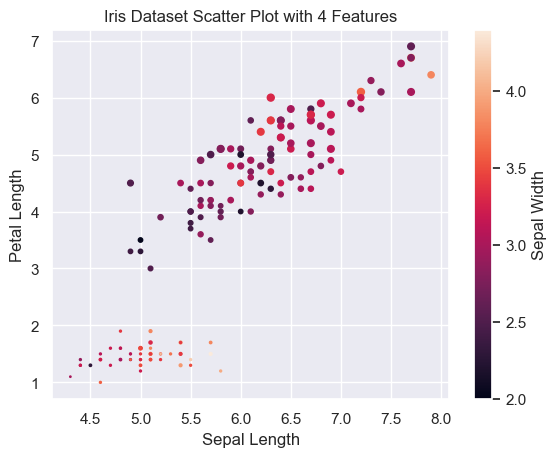

In [179]:
fig, ax1 = plt.subplots()

# Multiply petal_width by a scaling factor to make the dots larger for visualization purposes
scaled_petal_width = df.petal_width * 10

scatter_plot = ax1.scatter(x=df.sepal_length, y=df.petal_length, c=df.sepal_width, s=scaled_petal_width) # s = size of the dots

cbar = plt.colorbar(scatter_plot)
cbar.set_label('Sepal Width')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Petal Length')
plt.title('Iris Dataset Scatter Plot with 4 Features')
plt.show()

With some prelimiary plots we can see that as sepal length increases, petal length increasses.  
It is not quite as clear what happens to sepal width as petal width increases.

We can make another simple plot to look at that more closely:

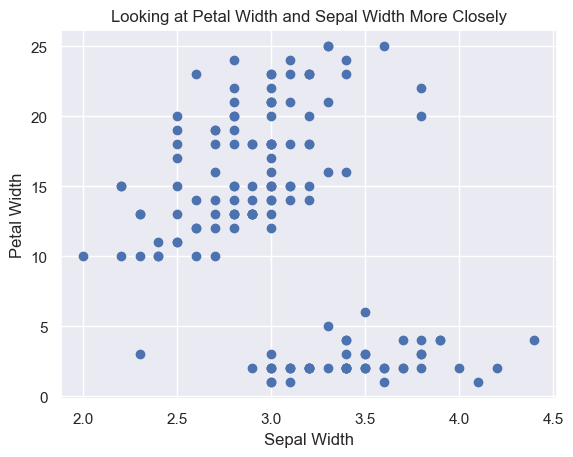

In [180]:
fig, ax2 = plt.subplots()

scatter_plot2 = ax2.scatter(x=df.sepal_width, y=scaled_petal_width)

ax2.set_xlabel('Sepal Width')
ax2.set_ylabel('Petal Width')
plt.title('Looking at Petal Width and Sepal Width More Closely')
plt.show()

There are two clear clusters in the data. Lets include the categorical data to see this visualized.  
Also, more advanced plots such as a pair plot should be used to look for clusters while taking into account all 4 features:

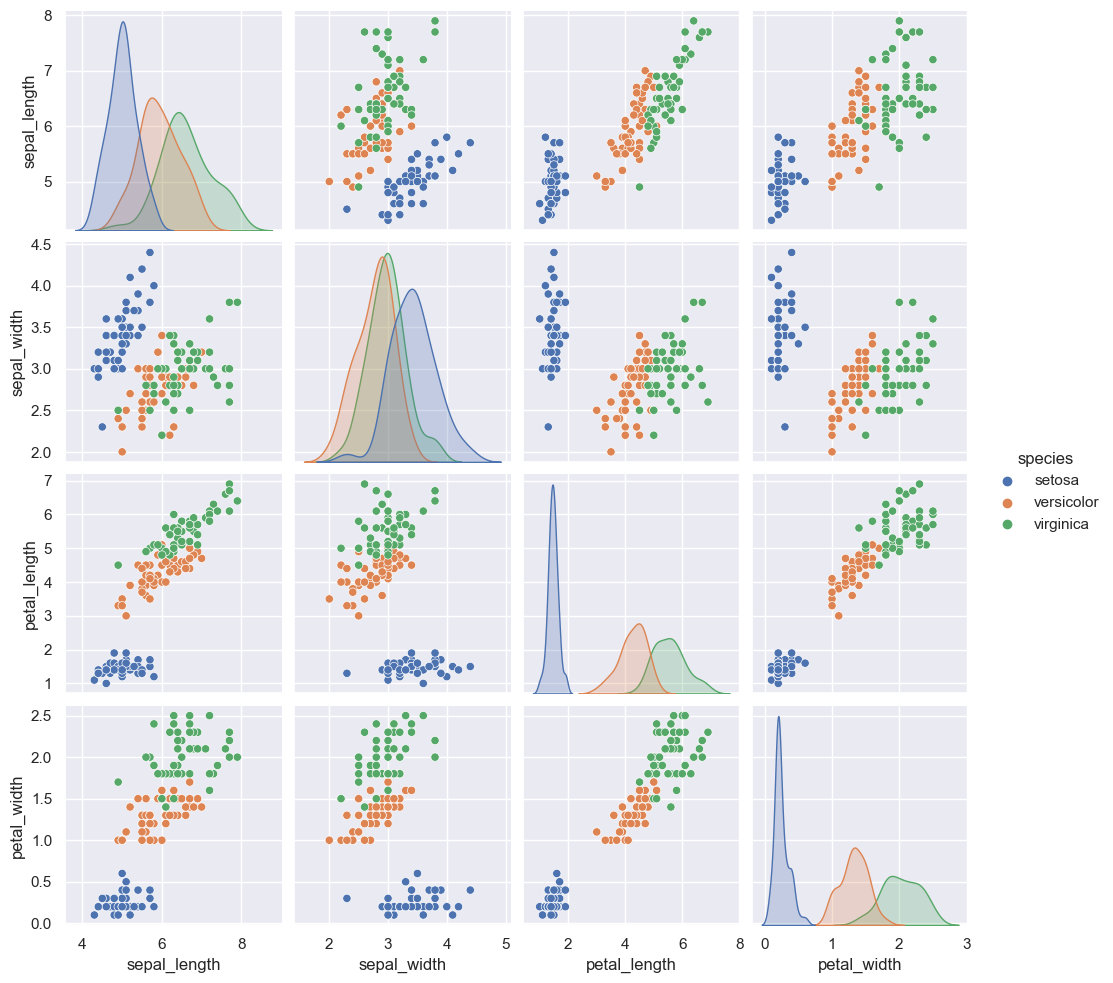

In [181]:
sns.pairplot(df, vars = df.columns[0:4], hue='species')

From the plots above we can see clear clustering based on features, which feature pairs will be useful for classification, and which may induce large errors such as sepal width and sepal length. 

`More Plot Examples`

We can also make more plots to see other informaiton such as:

(array([50., 50., 49.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

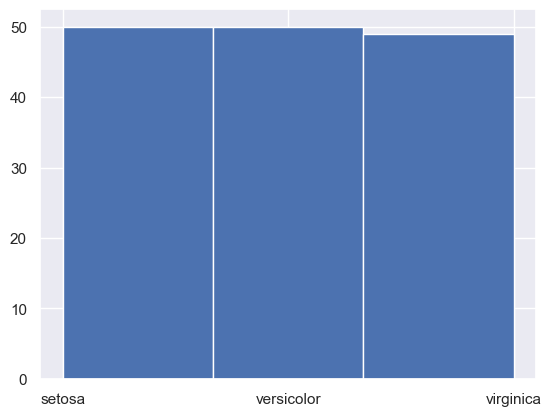

In [184]:
plt.hist(df.species, bins=3) # see how many of each species we have (50 of each, minus the one we dropped that we can now see was virginica)

<Axes: xlabel='species', ylabel='count'>

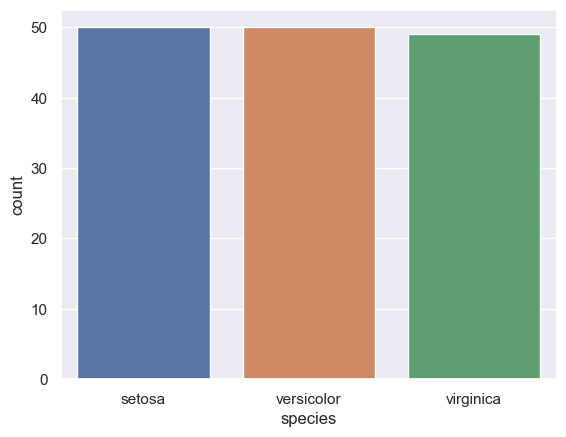

In [190]:
sns.countplot(data=df, x='species') # can also we done with count plot

<Axes: ylabel='species'>

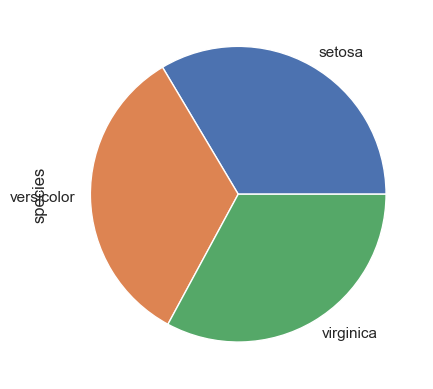

In [186]:
df['species'].value_counts().plot(kind='pie') # or we can do it as a pie chart but that doesn't tell us the numbers, just a cool visual

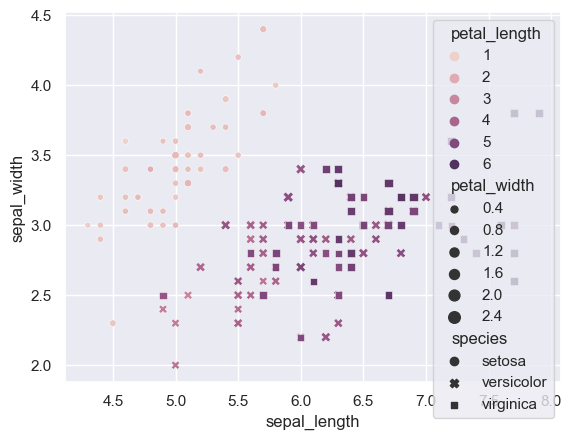

In [188]:
# scatter plots with all 4 features and the target can also be made like so:
sp1 = sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='petal_length', size='petal_width', sizes=(20, 200), style='species') 

In [189]:
# box plot

# violin

# kde

# heat

#strip

# cat

#joint

# parallel coordinates 1
# parallel corrdinates 2

`More Encoding and Data Prep`

Even though we already encoded our categorical data from its labl to a number, we can also get numeric arrays of binary, basically True/False data for each category.  
We can do this with OneHotEncoder to prepare our data further as shown below:


In [193]:
df.species

ohe = preprocessing.OneHotEncoder(sparse_output=False)

species_ohe = ohe.fit_transform(df.species.values.reshape(-1, 1))
species_ohe

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [194]:
df['species_ohe_1'] = species_ohe[:,0]
df['species_ohe_2'] = species_ohe[:,1]
df['species_ohe_3'] = species_ohe[:,2]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species,species_ohe_1,species_ohe_2,species_ohe_3
0,5.1,3.5,1.4,0.2,0,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,0,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,0,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,0,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,0,setosa,1.0,0.0,0.0


`Normalizaiton and/or Standardization can also be used to scale the data to a more useful range, but this is not necessary for this dataset as the featues are already on a similar scale.`